# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "685367a83db082318d3fca8ddb7462fd33d9ec0e"
connection.set_access_token(API_TOKEN)

# Strategy Creation

In [5]:
from volatility_trend_atr_v2 import VolatilityTrendATRV2 as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'data': 'success',
 'cstcId': 123717,
 'strategyId': '693845aa1629490da3084a7336772333'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('MSFT', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:MSFT'

## Setup Parameters

In [9]:
vendor_details = {
    'brokerName': 'ALPACAV2',
    'credentialParameters': {
        'CLIENT_API_KEY': 'PKPR0D9M7AAZSKIPEZW0', 
        'CLIENT_API_SECRET': 'o0Of72gD4jiVrmkq6P3RmggEbhjEhbak0c3RY0Eb'
    }
}

In [10]:
# For RT
broking_details = vendor_details
# for our case, vendor and broker both are same - Alpaca

In [11]:
parameters = {
    'TIMEPERIOD_ATR': 20,
    'ATR_PREV_CANDLES_NUM': 5
}

## Backtesting

### Start

In [ ]:
connection.backtest(
    strategy=strategy, 
    start='2023-05-01 09:15 -0400', 
    end='2023-05-11 15:30 -0400', 
    instrument='NASDAQ:MSFT', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    vendor_details=vendor_details    
)

### Status

In [12]:
connection.get_backtesting_job_status(strategy)

{'message': 'STOPPED', 'status': 0}

### Logs

In [13]:
logs = connection.get_backtesting_logs(strategy)
print(logs)

[2023-06-16 20:58:50] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-06-16 20:58:50] Sanity checks on cfg successful.
[2023-06-16 20:58:50] Currency set to "USD"
[2023-06-16 20:58:50] Setting up broker connection...
[2023-06-16 20:58:53] Broker connection has been setup successfully.
[2023-06-16 20:58:53] (NASDAQ_EQ) Funds available in client's ABVIRTUALBROKER account is : USD '1000000000.00'
[2023-06-16 20:58:53] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-06-16 20:58:53] Welcome ALGOBULLS VIRTUAL USER!
[2023-06-16 20:58:53] Reading strategy...
[2023-06-16 20:58:53] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2023-05-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2023-05-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      

### Stop

In [14]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


## Profit and Loss Reports

In [15]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,pnl_absolute,pnl_cumulative_absolute
0,NASDAQ,MSFT,2023-05-01 09:15:00-04:00,SELL,5,$,305.95,2023-05-01 09:28:00-04:00,BUY,5,$,306.41,-2.30,-2.30
1,NASDAQ,MSFT,2023-05-01 09:28:00-04:00,BUY,5,$,306.41,2023-05-01 09:45:00-04:00,SELL,5,$,306.95,2.70,0.40
2,NASDAQ,MSFT,2023-05-01 09:45:00-04:00,SELL,5,$,306.95,2023-05-01 09:46:00-04:00,BUY,5,$,306.88,0.35,0.75
3,NASDAQ,MSFT,2023-05-01 09:46:00-04:00,BUY,5,$,306.88,2023-05-01 09:56:00-04:00,SELL,5,$,307.81,4.65,5.40
4,NASDAQ,MSFT,2023-05-01 09:56:00-04:00,SELL,5,$,307.81,2023-05-01 10:02:00-04:00,BUY,5,$,307.09,3.60,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,NASDAQ,MSFT,2023-05-11 11:26:00-04:00,SELL,5,$,309.63,2023-05-11 11:40:00-04:00,BUY,5,$,309.66,-0.15,-25.35
192,NASDAQ,MSFT,2023-05-11 11:40:00-04:00,BUY,5,$,309.66,2023-05-11 11:43:00-04:00,SELL,5,$,309.97,1.55,-23.80
193,NASDAQ,MSFT,2023-05-11 11:43:00-04:00,SELL,5,$,309.97,2023-05-11 11:49:00-04:00,BUY,5,$,309.24,3.65,-20.15
194,NASDAQ,MSFT,2023-05-11 11:49:00-04:00,BUY,5,$,309.24,2023-05-11 11:50:00-04:00,SELL,5,$,309.15,-0.45,-20.60


## Statistics Reports

### Statistics

In [16]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)            # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2023-05-01
End Period          2023-05-11
Risk-Free Rate      0.0%
Time in Market      98.0%

Cumulative Return   -0.0%
CAGR﹪              -0.0%

Sharpe              -0.63
Prob. Sharpe Ratio  29.09%
Sortino             -0.79
Sortino/√2          -0.56
Omega               0.9

Max Drawdown        -0.0%
Longest DD Days     10

Gain/Pain Ratio     -0.29
Gain/Pain (1M)      -1.0

Payoff Ratio        0.78
Profit Factor       0.9
Common Sense Ratio  0.66
CPC Index           0.37
Tail Ratio          0.74
Outlier Win Ratio   3.04
Outlier Loss Ratio  3.78

MTD                 -0.0%
3M                  -0.0%
6M                  -0.0%
YTD                 -0.0%
1Y                  -0.0%
3Y (ann.)           -0.0%
5Y (ann.)           -0.0%
10Y (ann.)          -0.0%
All-time (ann.)     -0.0%

Avg. Drawdown       -0.0%
Avg. Drawdown Days  2
Recovery Factor     -0.34
Ulcer Index         0.0
Serenity Index      -0.03


### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)            # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2023-05-01
End Period                 2023-05-11
Risk-Free Rate             0.0%
Time in Market             98.0%

Cumulative Return          -0.0%
CAGR﹪                     -0.0%

Sharpe                     -0.63
Prob. Sharpe Ratio         29.09%
Smart Sharpe               -0.58
Sortino                    -0.79
Smart Sortino              -0.73
Sortino/√2                 -0.56
Smart Sortino/√2           -0.52
Omega                      0.9

Max Drawdown               -0.0%
Longest DD Days            10
Volatility (ann.)          0.0%
Calmar                     -12.56
Skew                       0.0
Kurtosis                   0.0

Expected Daily %           -0.0%
Expected Monthly %         -0.0%
Expected Yearly %          -0.0%
Kelly Criterion            -6.26%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.0%
Expected Shortfall (cVaR)  -0.0%

Max Consecutive Wins       8
M

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2023-05-01,2023-05-11,2023-05-11,10,-5.900000e-06,-5.345000e-06
2,2023-05-01,2023-05-01,2023-05-01,0,-4.850000e-07,-4.750000e-07
3,2023-05-01,2023-05-01,2023-05-01,0,-2.300000e-07,-2.250000e-07
4,2023-05-01,2023-05-01,2023-05-01,0,-3.500000e-08,0.000000e+00


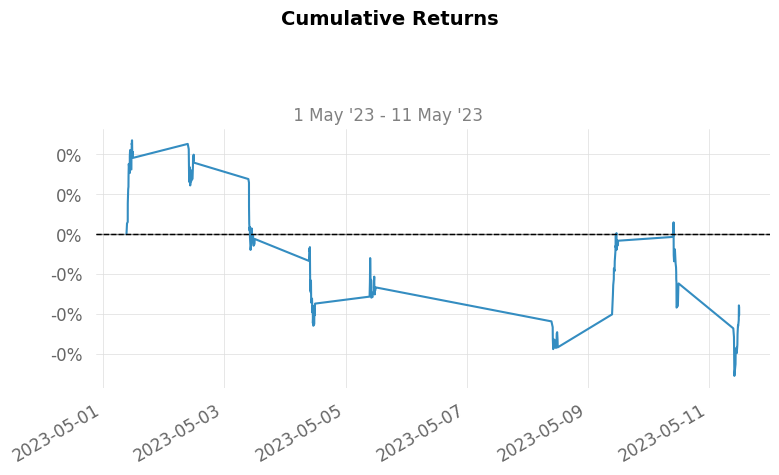

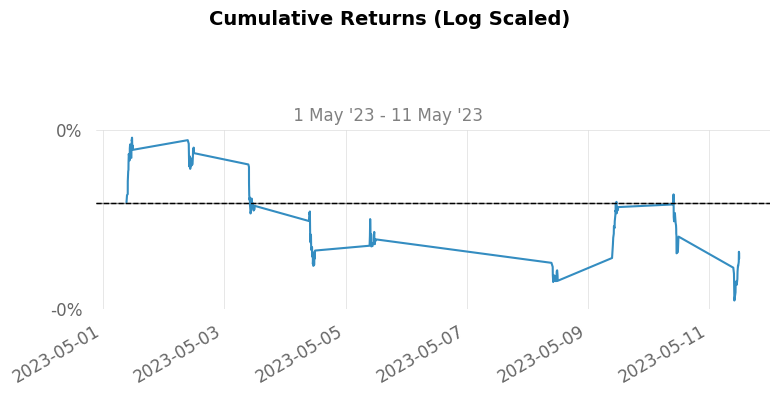

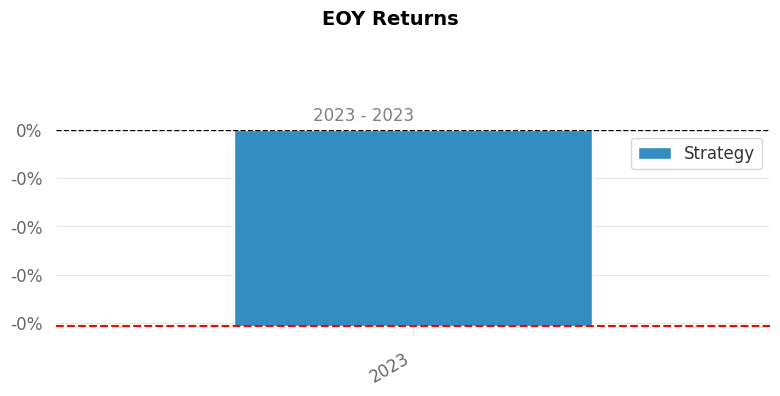

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/_plotting/core.py:355: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  _sns.kdeplot(returns, color='black', linewidth=1.5)


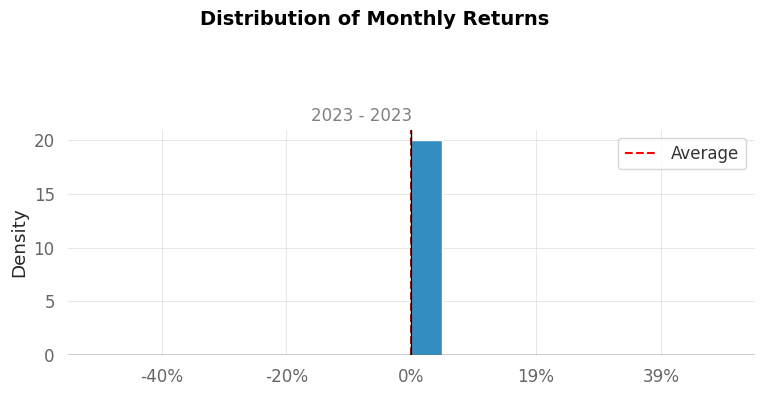

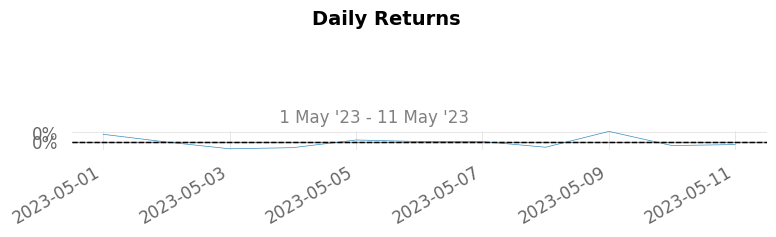

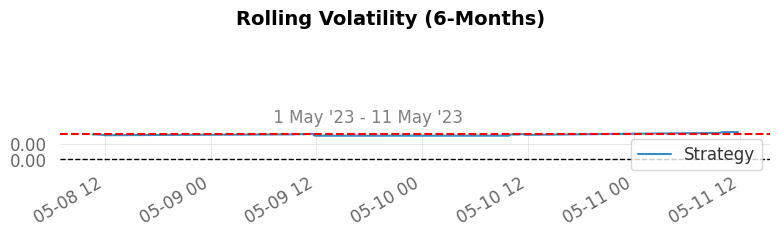

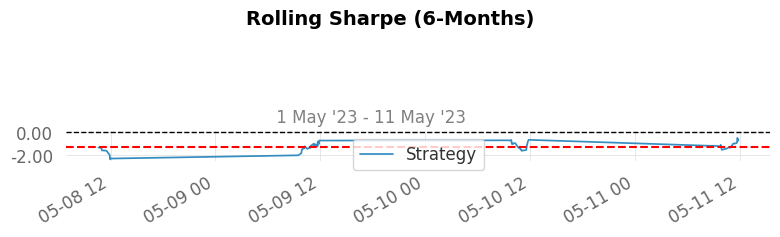

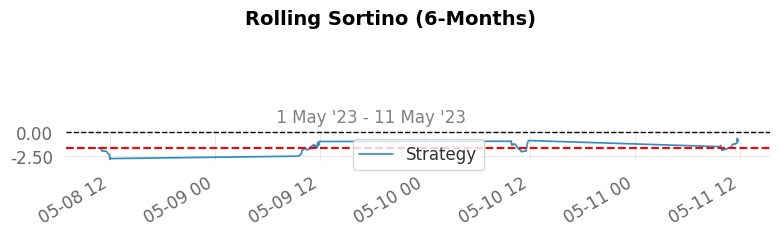

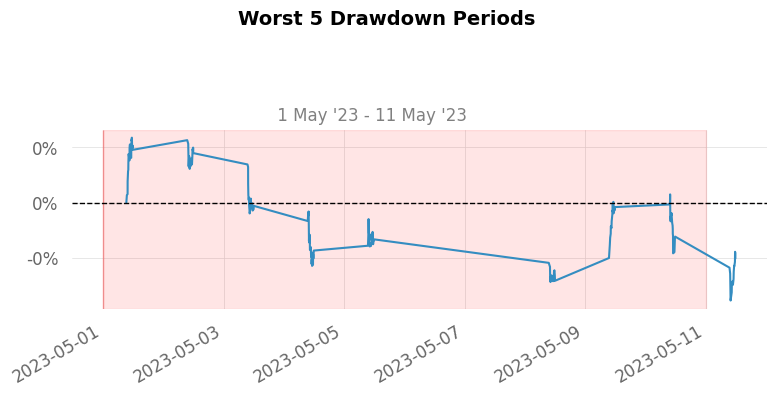

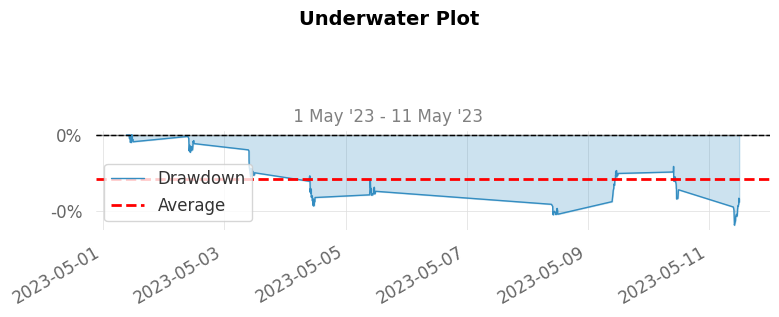

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


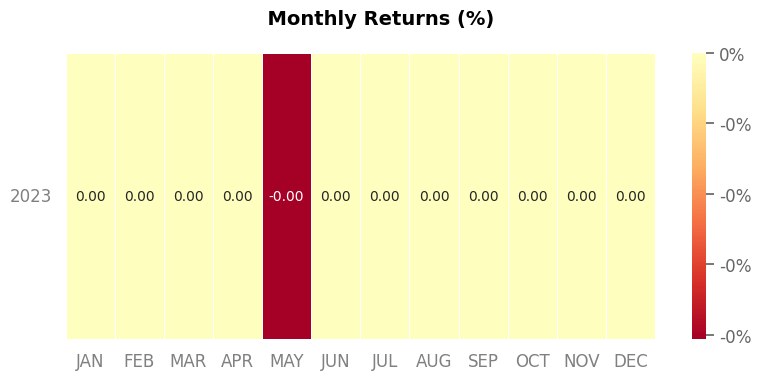

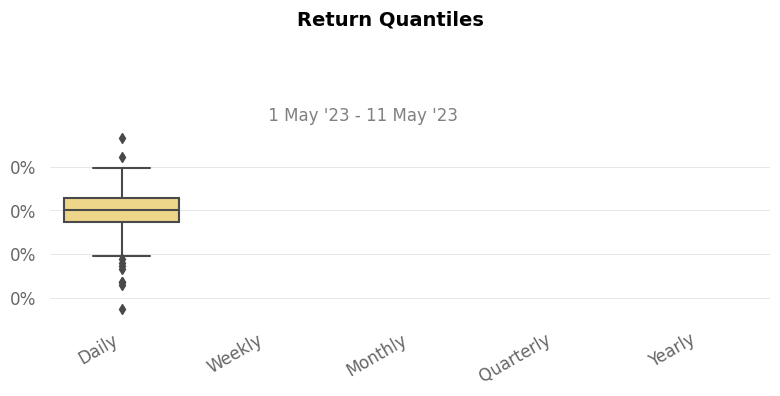

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/_plotting/core.py:355: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  _sns.kdeplot(returns, color='black', linewidth=1.5)
/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [17]:
connection.get_backtesting_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

## Order History

In [18]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)



+----------------+---------------------------+----------------------------------+------+
| INST           | TIME                      | ID                               | TT   |
|----------------+---------------------------+----------------------------------+------|
| NASDAQ_EQ:MSFT | 2023-05-01 09:15:00-04:00 | 1ba2ec9647b64730bdc3baff278aa16f | SELL |
+----------------+---------------------------+----------------------------------+------+
+----+----------------------------------+------------------------+-------+
|    | TIME                             | STATE                  | MSG   |
|----+----------------------------------+------------------------+-------|
|  0 | 2023-05-01 09:15:00.500000-04:00 | PUT ORDER REQ RECEIVED |       |
|  1 | 2023-05-01 09:15:00.500000-04:00 | VALIDATION PENDING     |       |
|  2 | 2023-05-01 09:15:00.500000-04:00 | OPEN PENDING           |       |
|  3 | 2023-05-01 09:15:00.500000-04:00 | OPEN                   |       |
|  4 | 2023-05-01 09:15:00.5

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='8:00 -0400', 
    end='15:00 -0400', 
    instruments='NASDAQ:NVDA', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    vendor_details=vendor_details,
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Papertrading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Papertrading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Papertrading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

## Realtrading

### Start

In [ ]:
connection.realtrade(
    strategy=strategy, 
    start='8:00 -0400', 
    end='15:00 -0400', 
    instruments='NASDAQ:TSLA', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_realtrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Realtrading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Realtrading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Realtrading)

In [ ]:
order_history = connection.get_realtrading_report_order_history(strategy)
print(order_history)